<a href="https://colab.research.google.com/github/lucila-03/Acidente/blob/main/Acidente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP para Análise de Acidentes de Trânsito Porto Alegre (2018 - 2022)
## Lucila da Conceição Castello Branco


## 1. Definição do Problema 

O dataset usado neste projeto será um arquivo público com informações de Acidentes de Trânsito em Porto Alegre (RS), o arquivo tem informações relativas aos acidentes de 2018 - 2022. O objetivo deste projeto é conhecer os tipos de acidentes identificar a região mais perigosa e se preparar para os possíveis acidentes para 2023.
Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/tkunzler/acidentes-de-trnsito-porto-alegre-2018-2022?resource=download


**Informações sobre os atributos:**
1.  data_extracao - Data e hora de realização da extração de dados do sistema
2.  idacidente - Número de identificação do acidente.
3.  longitude - Coordenada geográfica (eixo X) de localização do ponto onde ocorreu o acidente.
4.  latitude- Coordenada geográfica (eixo Y) de localização do ponto onde ocorreu o acidente.
5.  log1- Nome do Logradouro onde ocorreu o acidente.
6.  log2- Nome do Logradouro que cruza o Logradourono ponto onde ocorreu o acidente.
7.  predial1 - Número do Logradouro onde ocorreu o acidente
8.  tipo_acid - Informação descritiva do tipo de acidente
9.  queda_arr - Informação se no acidente houve queda de algum veículo em arroio.
10. data - Data em que ocorreu o acidente.
11. dia_sem - Dia da semana em que ocorreu o acidente.
12. hora - Hora em que ocorreu o acidente.
13. feridos - Número de feridos no acidente.
14. feridos_gr - Número de feridos graves no acidente.
15. mortes - Contagem de vítimas fatais no momento do acidente.
16. morte_post - Contagem de vítimas fatais posteriores ao momento do acidente e relacionadas ao mesmo. É considerado morte posterior a vítima que veio a óbito 30 dias após a data do acidente de trânsito.
17. fatais - Somatório das vítimas fatais no momento do acidente e das vítimas posteriores relacionadas ao mesmo.
18. auto, taxi, lotacao, caminhao, motocicletas, bicicletas, carrocas, outro - Número de veículos do tipo automóvel envolvidos no acidente.
19. onibus_urb - Número de ônibus urbanos envolvidos no acidente
20. onibus_met - Número de ônibus metropolitanos envolvidos no acidente
21. onibus_int - Número de ônibus interurbanos envolvidos no acidente
22. acidentenoite_dia - Turno em que ocorreu o acidente.
23. regiao - Zona da cidade onde ocorreu o acidente de acordo com as divisões dos Postos de Controles Avançados (PCA) da fiscalização da EPTC.
24. cont_vit- Informação -se o acidente possui ou não vítimas.
25. ups - Unidade padrão de severidade: Peso -atribuído aos tipos de acidentes de acordo com a gravidade dos danos causados.
26. consorcio - Consórcio responsável pelo (s) ônibus urbano (s) envolvido (s) no acidente.

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import missingno as ms 
from pandas.core.dtypes.common import is_int64_dtype
from pandas.core.groupby.groupby import dedent
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from pandas.core.internals.construction import dataclasses_to_dicts
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Carga de Dados

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Importação do dataset
url = "https://raw.githubusercontent.com/lucila-03/Acidente/main/cat_acidentes_atualizado_novo.csv"
dataset = pd.read_csv(url, delimiter = ";", encoding='ISO-8859-1' )


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
dataset.shape

(60960, 34)

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data_extracao  60960 non-null  object 
 1   predial1       59768 non-null  float64
 2   queda_arr      60960 non-null  float64
 3   data           60960 non-null  object 
 4   feridos        60960 non-null  int64  
 5   feridos_gr     60960 non-null  int64  
 6   mortes         60960 non-null  int64  
 7   morte_post     60960 non-null  int64  
 8   fatais         60960 non-null  int64  
 9   auto           60960 non-null  int64  
 10  taxi           60960 non-null  int64  
 11  lotacao        60960 non-null  int64  
 12  onibus_urb     60960 non-null  int64  
 13  onibus_met     60960 non-null  int64  
 14  onibus_int     60960 non-null  int64  
 15  caminhao       60960 non-null  int64  
 16  moto           60960 non-null  int64  
 17  carroca        60960 non-null  int64  
 18  bicicl

É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões, com base nas informações do dataset, foi identificado que a coluna data precisa mudar de atributo.

In [ ]:
# Alterar atributo para data
dataset['data'] = pd.to_datetime(dataset['data'], format='%Y-%m-%d %H:%M:%S')


Após a solicitação de mudança precisamos verificar se ficou certo.

In [ ]:
 # Verifica o tipo de dataset de cada atributo
dataset.dtypes

data_extracao            object
predial1                float64
queda_arr               float64
data             datetime64[ns]
feridos                   int64
feridos_gr                int64
mortes                    int64
morte_post                int64
fatais                    int64
auto                      int64
taxi                      int64
lotacao                   int64
onibus_urb                int64
onibus_met                int64
onibus_int                int64
caminhao                  int64
moto                      int64
carroca                   int64
bicicleta                 int64
outro                     int64
cont_vit                  int64
ups                       int64
patinete                  int64
idacidente                int64
longitude               float64
latitude                float64
log1                     object
log2                     object
tipo_acid                object
dia_sem                  object
hora                     object
noite_di

In [ ]:
# Mostra as 5 primeiras linhas do dataset
dataset.head(5)

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2023-01-01 01:32:59,0.0,0.0,2020-10-17,1,0,0,0,0,3,...,NaN,NaN,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÃBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2023-01-01 01:32:59,170.0,0.0,2018-01-01,1,0,0,0,0,1,...,-51.214455,-30.122420,R CASEMIRO DE SOUZA,NaN,ATROPELAMENTO,SEGUNDA-FEIRA,00:30:00.0000000,NOITE,SUL,NaN
2,2023-01-01 01:32:59,2617.0,0.0,2018-01-01,0,0,0,0,0,1,...,-51.203106,-30.073318,AV PROF OSCAR PEREIRA,NaN,COLISÃO,SEGUNDA-FEIRA,07:55:00.0000000,DIA,SUL,NaN
3,2023-01-01 01:32:59,1590.0,0.0,2018-01-01,1,0,0,0,0,1,...,-51.134118,-30.229493,AV BOA VISTA,NaN,CHOQUE,SEGUNDA-FEIRA,20:18:00.0000000,NOITE,SUL,NaN
4,2023-01-01 01:32:59,0.0,0.0,2018-01-01,1,0,0,0,0,1,...,NaN,NaN,AV BOA VISTA,NaN,CHOQUE,SEGUNDA-FEIRA,11:00:00.0000000,DIA,SUL,NaN


Neste primeiro momento percebe-se que tem dados faltando, será necessário fazer a limpeza.

In [ ]:
# Mostra as 5 últimas linhas do dataset
dataset.tail(5)

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
60955,2023-01-01 01:32:59,3725.0,0.0,2022-12-28,0,0,0,0,0,2,...,-51.119439,-30.104099,ESTR JOAO DE OLIVEIRA REMIAO,NaN,CHOQUE,QUARTA-FEIRA,11:40:00.0000000,DIA,LESTE,NaN
60956,2023-01-01 01:32:59,2000.0,0.0,2022-12-28,0,0,0,0,0,2,...,-51.121393,-30.091089,R DOLORES DURAN,NaN,ABALROAMENTO,QUARTA-FEIRA,09:15:00.0000000,DIA,LESTE,NaN
60957,2023-01-01 01:32:59,1.0,0.0,2022-12-28,0,0,0,0,0,1,...,-51.161485,-30.062693,R SAO GUILHERME,R SALDANHA DA GAMA,COLISÃO,QUARTA-FEIRA,08:10:00.0000000,DIA,LESTE,NaN
60958,2023-01-01 01:32:59,2262.0,0.0,2022-12-27,0,0,0,0,0,1,...,-51.206021,-30.043200,AV IPIRANGA,NaN,COLISÃO,TERÃA-FEIRA,15:15:00.0000000,DIA,LESTE,NaN
60959,2023-01-01 01:32:59,958.0,0.0,2022-12-27,0,0,0,0,0,1,...,-51.196367,-30.026147,R CEL BORDINI,R TEN CEL FABRICIO PILAR,COLISÃO,TERÃA-FEIRA,12:31:00.0000000,DIA,LESTE,NaN


In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,predial1,queda_arr,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,...,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude
count,59768.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.00000,...,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,53987.000000,53987.000000
mean,1488.357081,0.000804,0.441814,0.084564,0.003100,0.002920,0.006020,1.444341,0.025738,0.01063,...,0.288550,0.000328,0.020423,0.001854,0.377838,2.558202,0.000016,674396.153363,-51.184279,-30.047377
std,2401.897473,0.028340,0.670626,0.301602,0.057908,0.054563,0.080272,0.774573,0.160413,0.10335,...,0.477558,0.018110,0.143288,0.044144,0.484851,2.089759,0.004050,17738.216655,0.038232,0.043389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,190816.000000,-51.265733,-30.244641
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,659149.750000,-51.213804,-30.065203
50%,551.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,674407.500000,-51.190742,-30.038466
75%,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,689673.250000,-51.157226,-30.017670
max,90010.000000,1.000000,25.000000,5.000000,3.000000,2.000000,4.000000,10.000000,2.000000,2.00000,...,4.000000,1.000000,2.000000,2.000000,1.000000,13.000000,1.000000,704931.000000,-50.272568,-29.903478


Tem muitas colunas com valor "0", mas não significa que está errado, pelo contrario, por se tratar de acidente é positivo.
O resumo estatísitico não oferece muitas informações sobre os meios de transporte, portanto vou fazer uma separação somente para os meios de transporte.

In [ ]:
# Faz uma divisão somente para os meios de transporte
veiculo_col = [ 'auto', 'taxi', 'lotacao','onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta', 'patinete', 'outro']

# Faz um resumo estatístico dos veículos (média, desvio padrão, mínimo, máximo e os quartis)
dataset[veiculo_col].describe()

,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,patinete,outro
count,60960.000000,60960.000000,60960.00000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000,60960.000000
mean,1.444341,0.025738,0.01063,0.039337,0.006365,0.009072,0.089124,0.288550,0.000328,0.020423,0.000016,0.001854
std,0.774573,0.160413,0.10335,0.197329,0.080551,0.094985,0.294773,0.477558,0.018110,0.143288,0.004050,0.044144
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,2.000000,2.00000,3.000000,3.000000,2.000000,3.000000,4.000000,1.000000,2.000000,1.000000,2.000000


Esse dataset não tem uma coluna juntando todos os veículos, isso pode ser necessário para análises futuras.

In [ ]:
# Somar os valores das colunas e armazená-los em uma nova coluna
dataset['veiculo_tot'] = dataset[veiculo_col].sum(axis=1)

# Lista de colunas de interesse
#labels_atributos = ['data', 'dia_sem', 'tipo_acid', 'queda_arr','noite_dia','feridos', 'feridos_gr','mortes', 'morte_post', 'fatais', 'cont_vit', 'ups', 'auto', 'taxi', 'lotacao', 'caminhao',
           #'moto', 'bicicleta', 'carroca', 'patinete', 'outro', 'onibus_urb','onibus_met', 'onibus_int', 'veiculo_tot','regiao']

### 3.2. Visualizações Unimodais

Será criado um histograma para cada atributo do dataset para conhecer melhor cada uma das colunas.


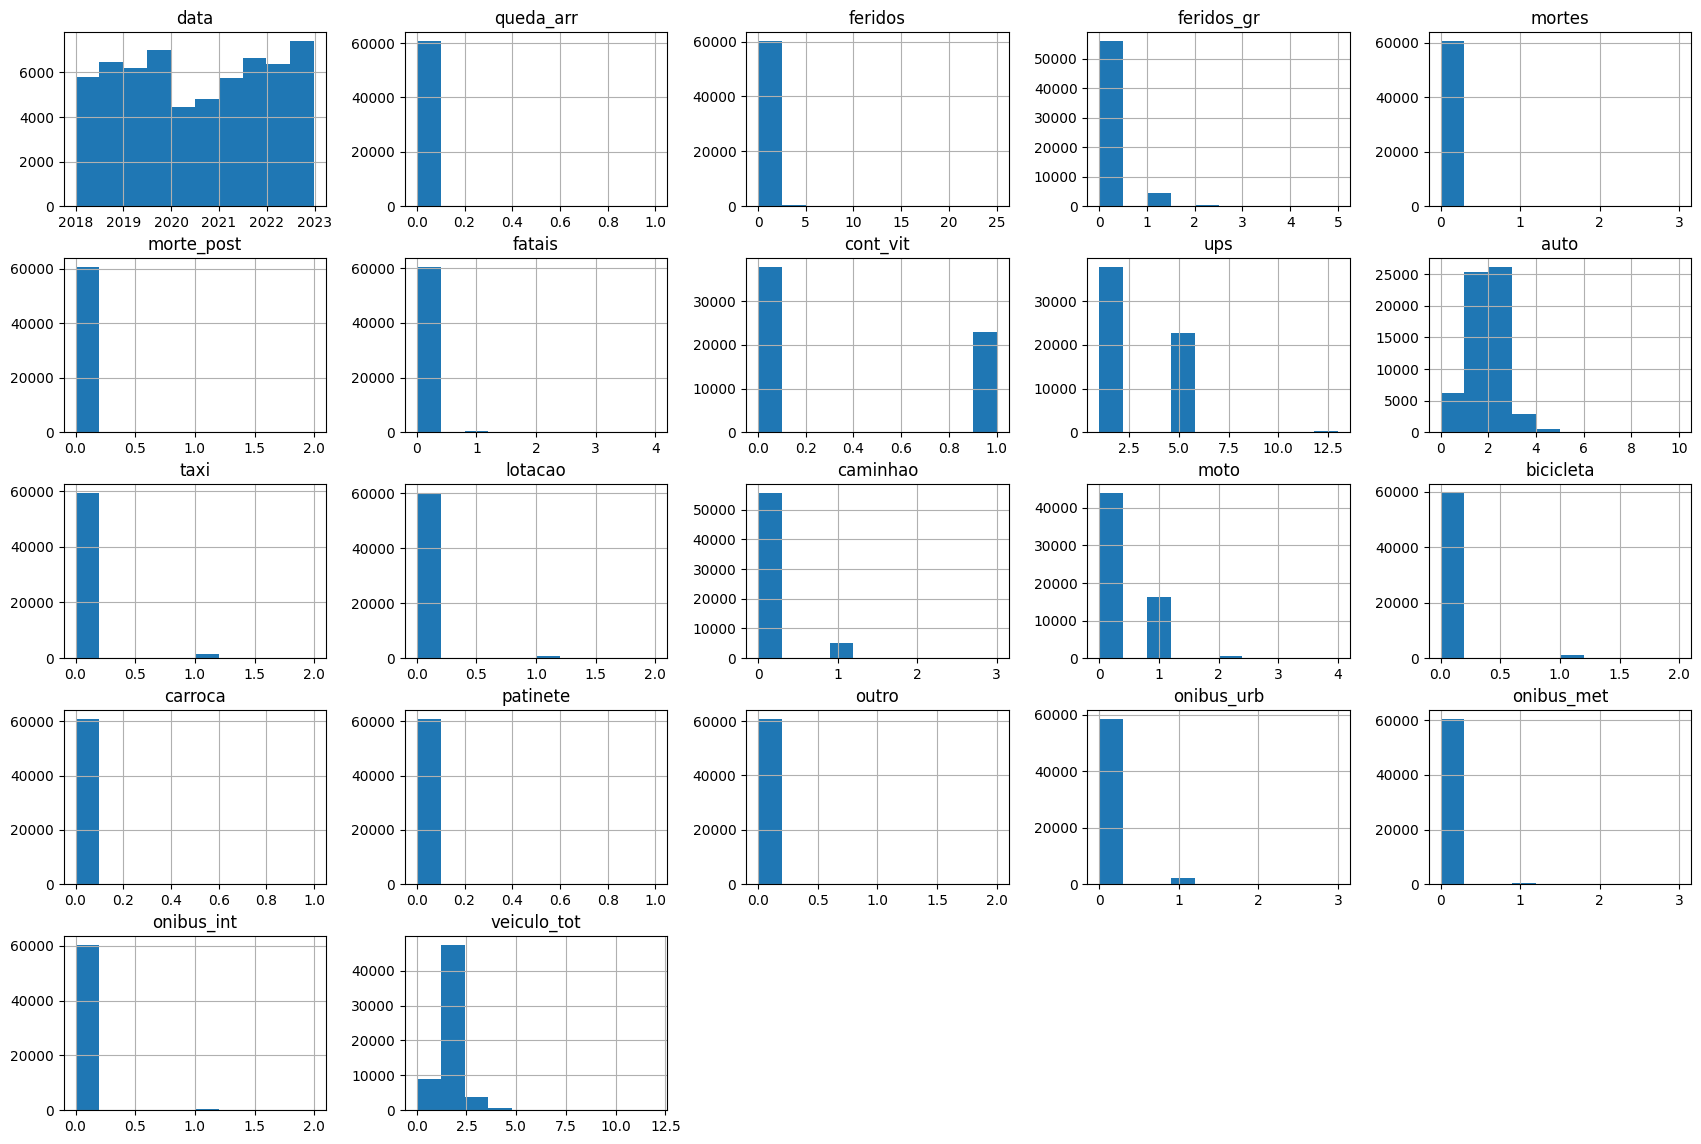

In [ ]:
# Histograma
dataset[labels_atributos].hist(figsize = (21,14))
plt.show()

O histograma aparentemente demonstra que os acidentes acontecem principalmente com automáveis e em segundo lugar estão os acidentes com motocicletas mas sua grande maioria são de baixa gravidade.
No **boxblot**, pode ser que haja algum ponto ainda não percebido no histograma.O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.


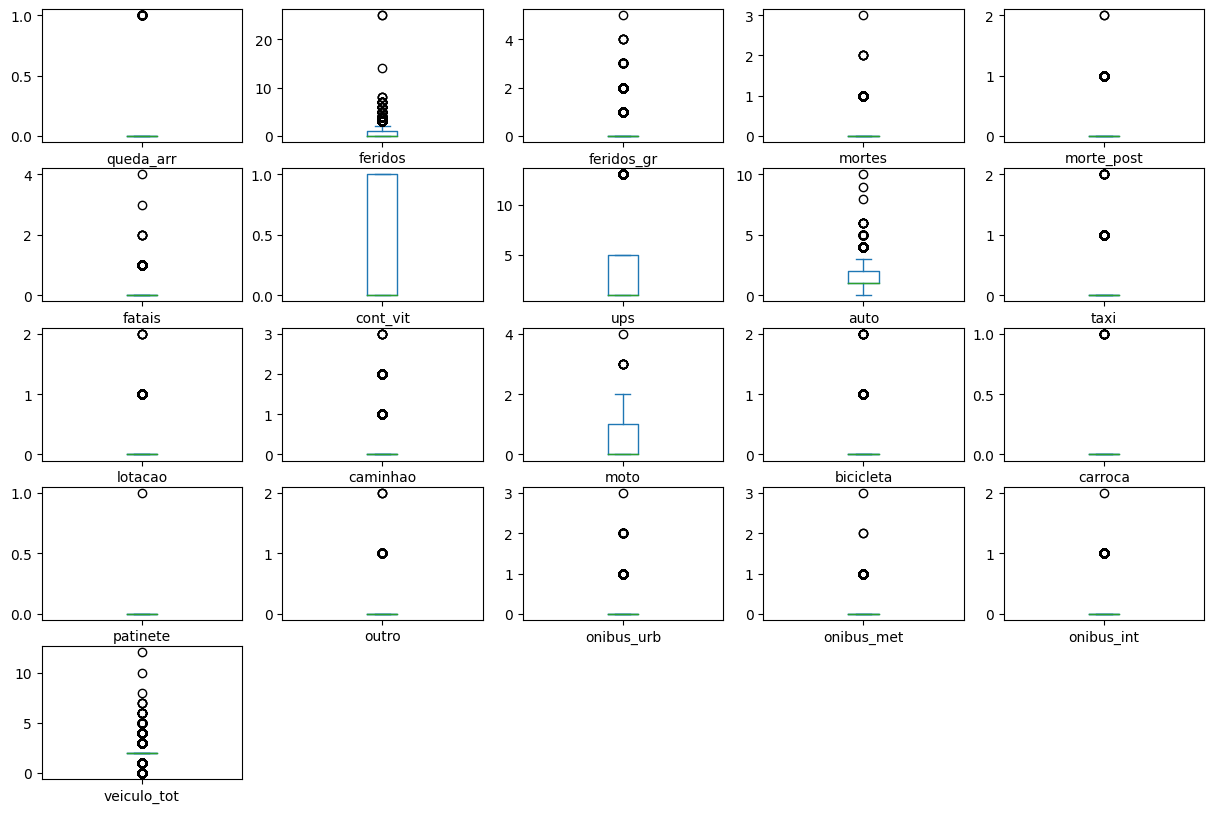

In [ ]:
# Boxplot
dataset[labels_atributos].plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (15,10))
plt.show()

No Boxplot percebe-se que os dados ficam muito distribuidos e muitas informções são "zero" não são os melhores gráficos para ter uma demonstração do arquivo.

### 3.3. Visualizações Multimodais

Ao fazer visualizações multimodais podem ser feitas análises mais apuradas e visualizar as correlações entre os atributos através da matriz de correlação. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida entre os atributos.

Vamos  verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis, 
* Próximo de +1: há uma correlação positiva entre as variáveis. 
* 0: não há correlação entre as variáveis.

<ipython-input-150-0a7b97a3d3d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset[labels_atributos].corr(), annot=True, cmap='RdBu');


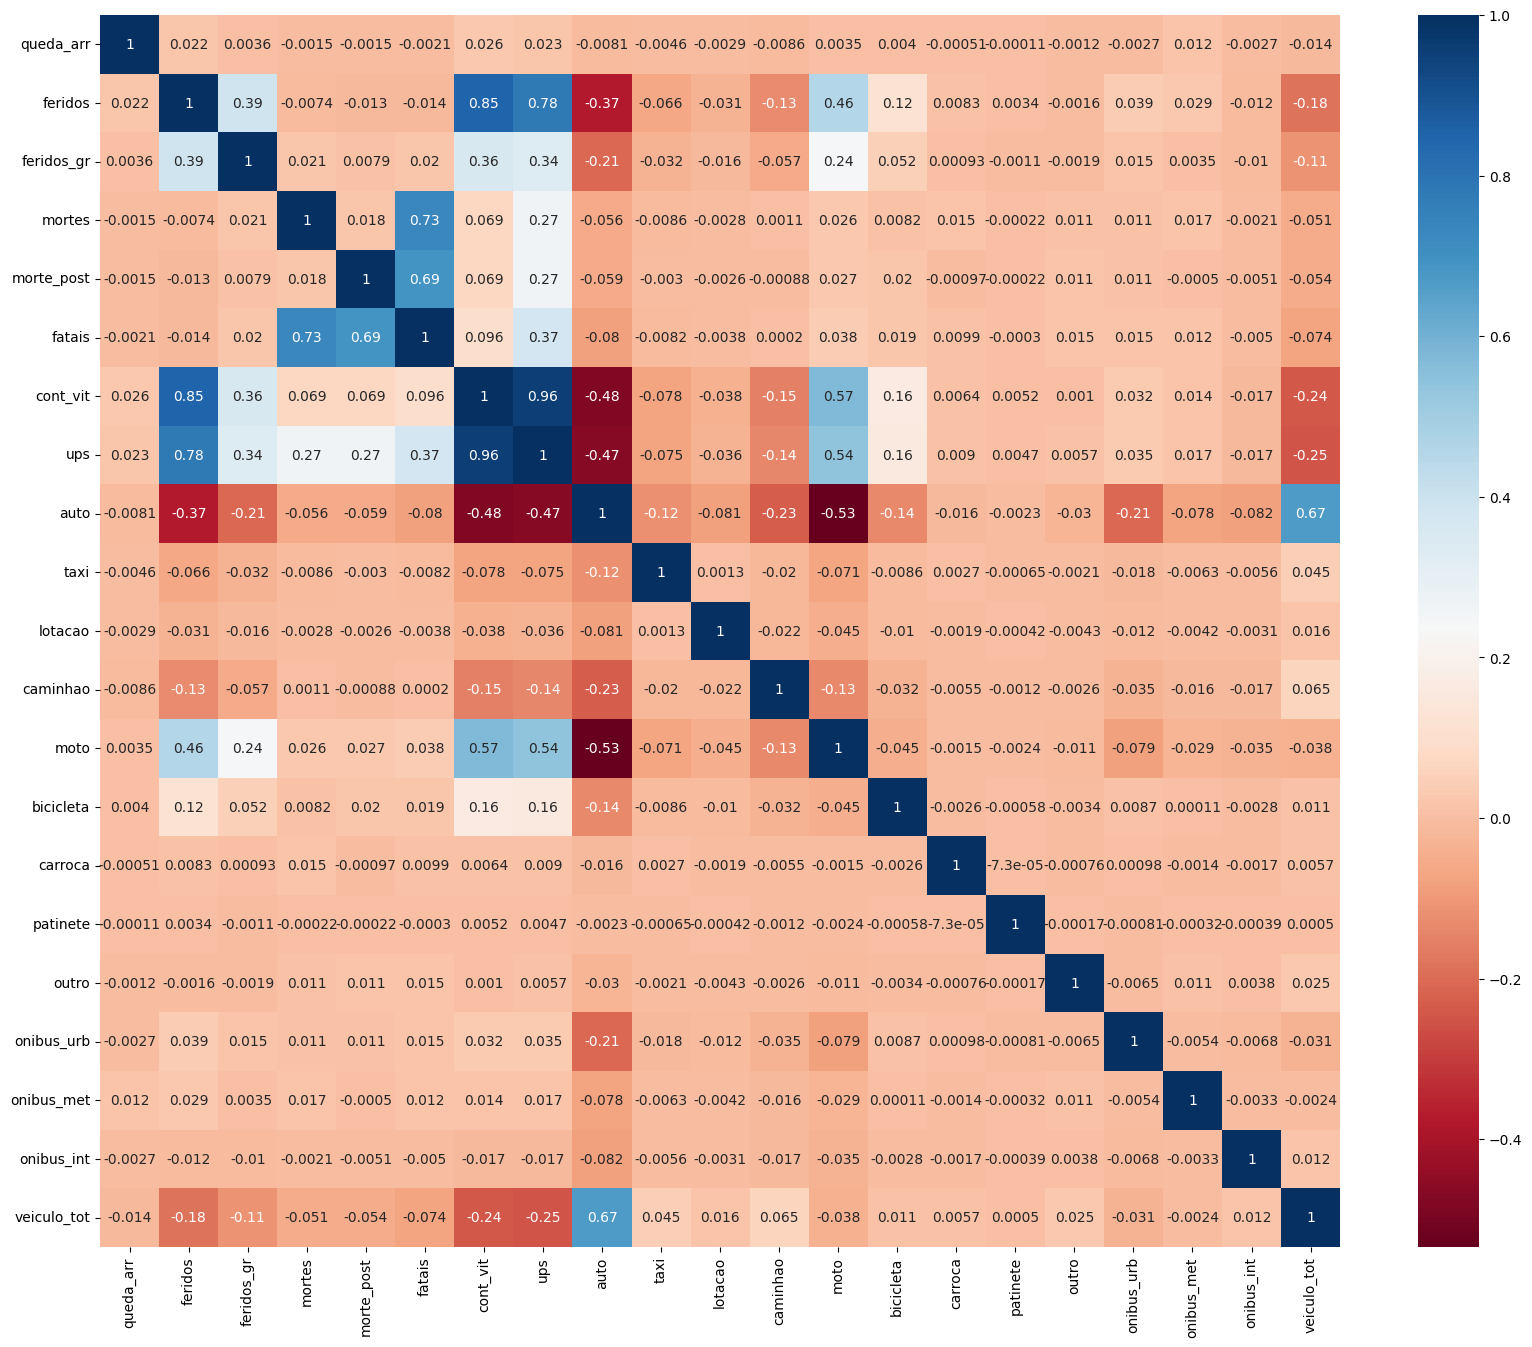

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(dataset[labels_atributos].corr(), annot=True, cmap='RdBu');

Atrávés da Matriz de Correlação, foi identificado que a severidade do acidente e a informação de vítimas é próximo demonstrando que tem uma relação muito próxima, mas é interessante destacar que a gravidade dos feridos e a severidade do acidente não é muito próxima, somente 0,34. Outro fato interessante é que o acidente de carro tem baixa relação com a gravidade e vitimas, aliás, o mais próximo é o de moto, ainda assim a relação é pequena, 0,54.

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

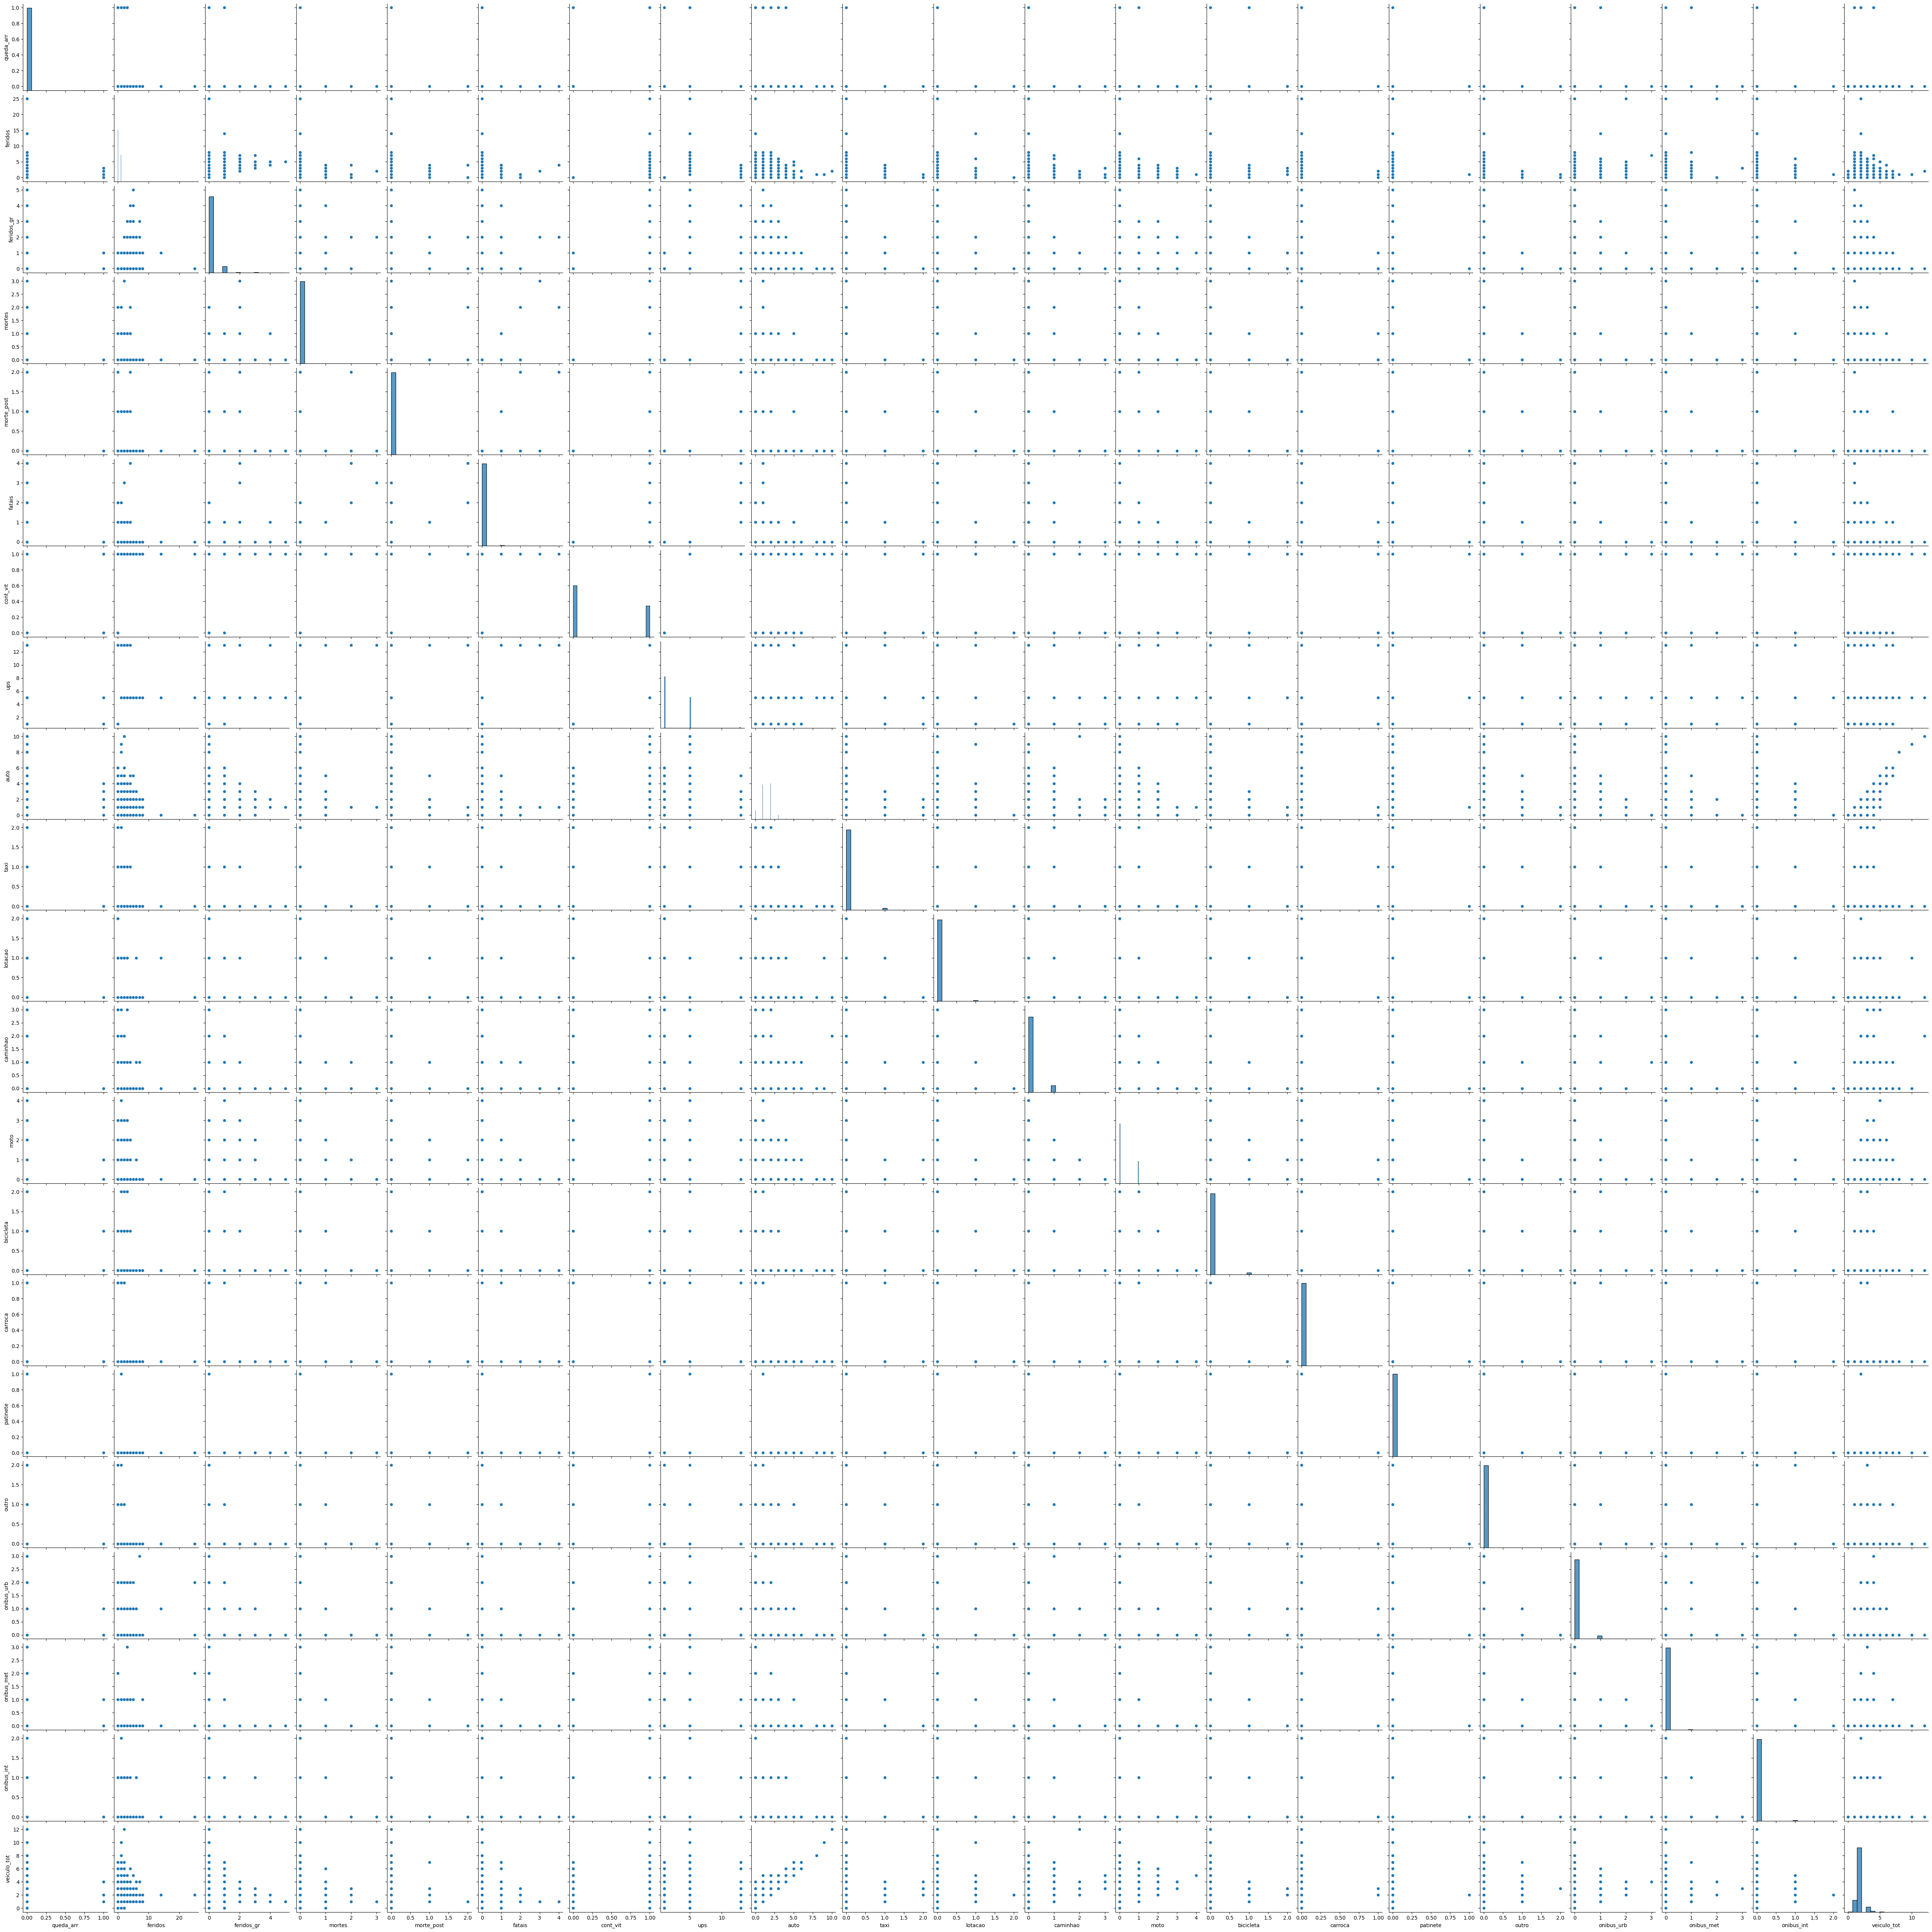

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset[labels_atributos])

Não há nenhuma relação clara como um todo, mas um gráfico de barras somente entre os veículos pode identificar como é a distribuição dos acidentes entre os veículos.

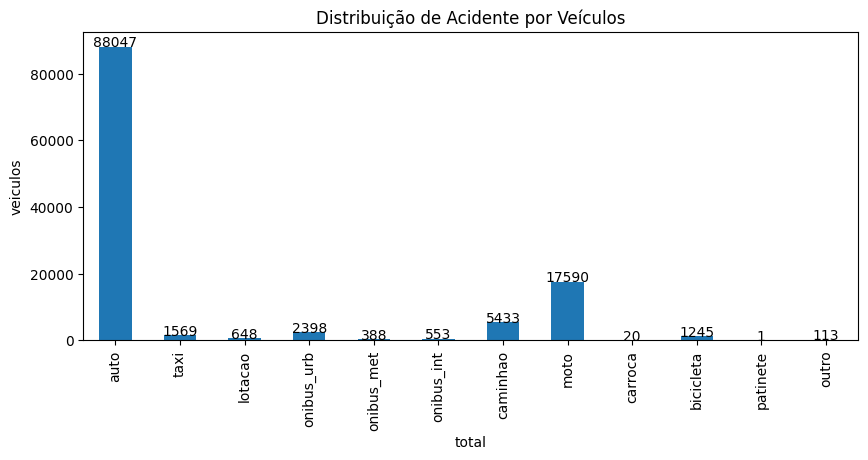

In [ ]:
# Gráfico de barra

# calcular a soma de cada coluna
soma_col = dataset[veiculo_col].sum()

# Define o tamanho da figura
plt.figure(figsize=(10, 4))

# plotar um gráfico de barras
soma_col.plot(kind='bar')

# Adiciona os valores acima das barras
for i, v in enumerate(soma_col):
    plt.text(i, v+1, str(v), ha='center')

# adicionar títulos e legendas
plt.title('Distribuição de Acidente por Veículos')
plt.xlabel('total')
plt.ylabel('veiculos')
plt.show()

Indiscutivelmente, o maior  número de acidentes é de carro, seguido dos acidentes de moto, mas a incidência dos acidentes de carro é muito maior. Vale lembrar que no modelo de correlação, a correlação entre carro e moto é negativa, conclui-se que a maioria seja de carro com carro.

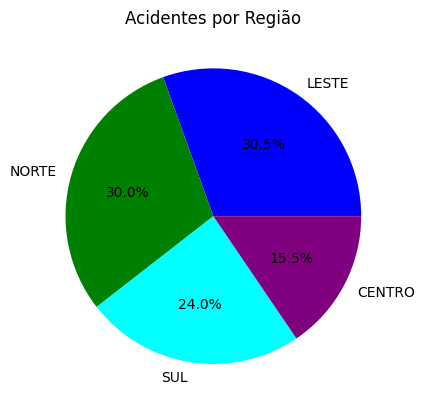

In [ ]:
# Gráfico de pizza

# Conta as ocorrências em cada região
cont_regiao = dataset['regiao'].value_counts()

# Define as cores
cores = 'blue', 'green', 'cyan', 'purple'

# Plota o gráfico de pizza
plt.pie(cont_regiao, labels=cont_regiao.index, colors = cores,  autopct='%1.1f%%')
plt.title('Acidentes por Região')
plt.show()


Através do gráfico percebe-se que há um certo equilibrio entre as regiões, mas a região Norte e região Leste são as que tem maior ocorrência de acidentes.

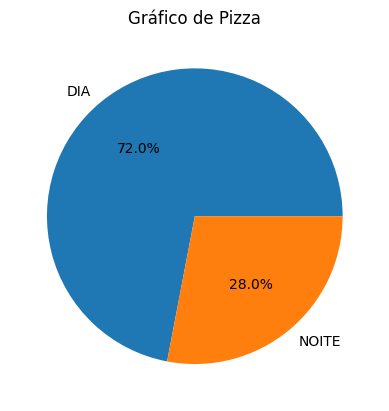

In [ ]:
# Gráfico de pizza

# Conta as ocorrências 
cont_noitedia = dataset['noite_dia'].value_counts()

# Plota o gráfico de pizza
plt.pie(cont_noitedia, labels=cont_noitedia.index, autopct='%1.1f%%')
plt.title('Gráfico de Pizza')
plt.show()


A maior ocorrência de acidentes é durante o dia. Tlvez o fluxo de transportes também seja muito maior.

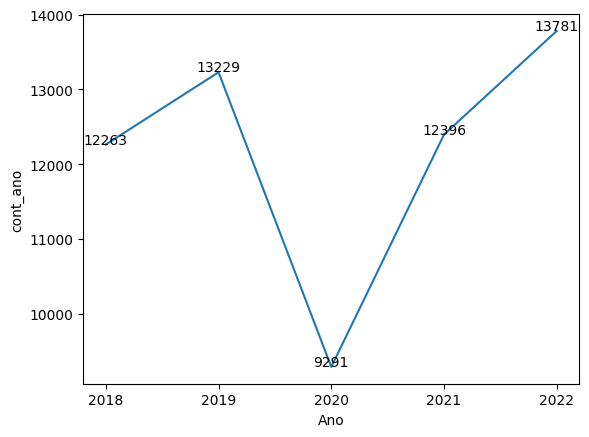

In [ ]:
# Cria uma linha somente com o ano
dataset['ano'] = dataset['data'].dt.year.astype('str')

# Contagem em cada ano
cont_ano = dataset['ano'].value_counts().sort_index()

# Adiciona os valores acima das linhas
for i, v in enumerate(cont_ano):
   plt.text(i, v+10, str(v), ha='center')

# Cria gráfico de Linha
plt.plot(cont_ano.index, cont_ano.values)

# Adicionar legenda e rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('cont_ano')
plt.show()

Esse gráfico foi pensado para entender como foi a evolução dos acidentes no decorrer dos anos. Houve uma queda brusca nos acidentes de trânsito em 2020, é possível que na pandemia as pessoas tenham ficado mais em casa, diminuindo a circulação de veículos, mas com o passar do tempo tudo tenha começado a normalizar.

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

O dataset não tem missings aparentes, mas é importante avaliar se há missings e ajustá-los. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

data_extracao        0
predial1          1192
queda_arr            0
data                 0
feridos              0
feridos_gr           0
mortes               0
morte_post           0
fatais               0
auto                 0
taxi                 0
lotacao              0
onibus_urb           0
onibus_met           0
onibus_int           0
caminhao             0
moto                 0
carroca              0
bicicleta            0
outro                0
cont_vit             0
ups                  0
patinete             0
idacidente           0
longitude         6973
latitude          6973
log1                22
log2             43371
tipo_acid            0
dia_sem              0
hora               198
noite_dia            0
regiao               2
consorcio        58765
veiculo_tot          0
ano                  0
dtype: int64

A coluna regiao apresenta 2 nulos, o número de prédio, pode realmente não existir,visto que nem todo o acidente de carro é em frente a um prédio. Log2 é de rua, também pode acontecer. o quesito hora não tem problema, pois a coluna data também tem hora e o consorcio serve apenas para o caso de ônibus, não há necessidade.

<Axes: >

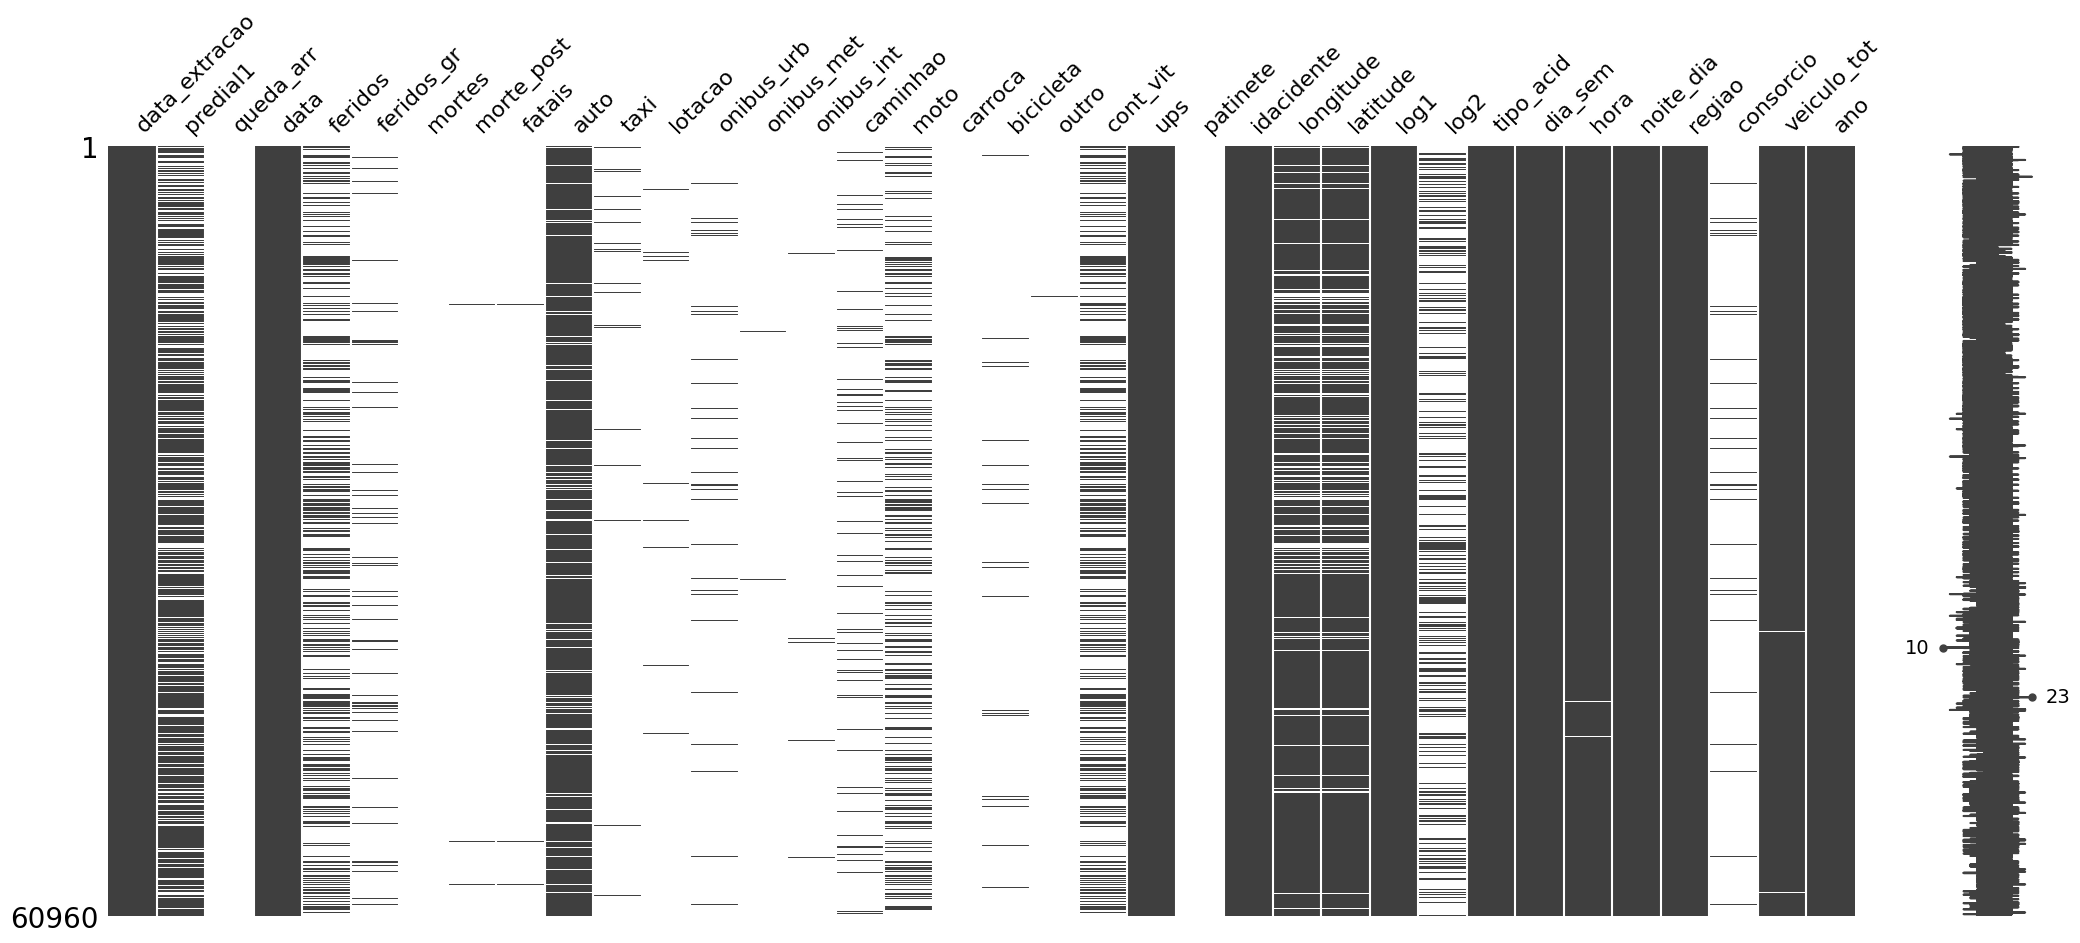

In [ ]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

<Axes: >

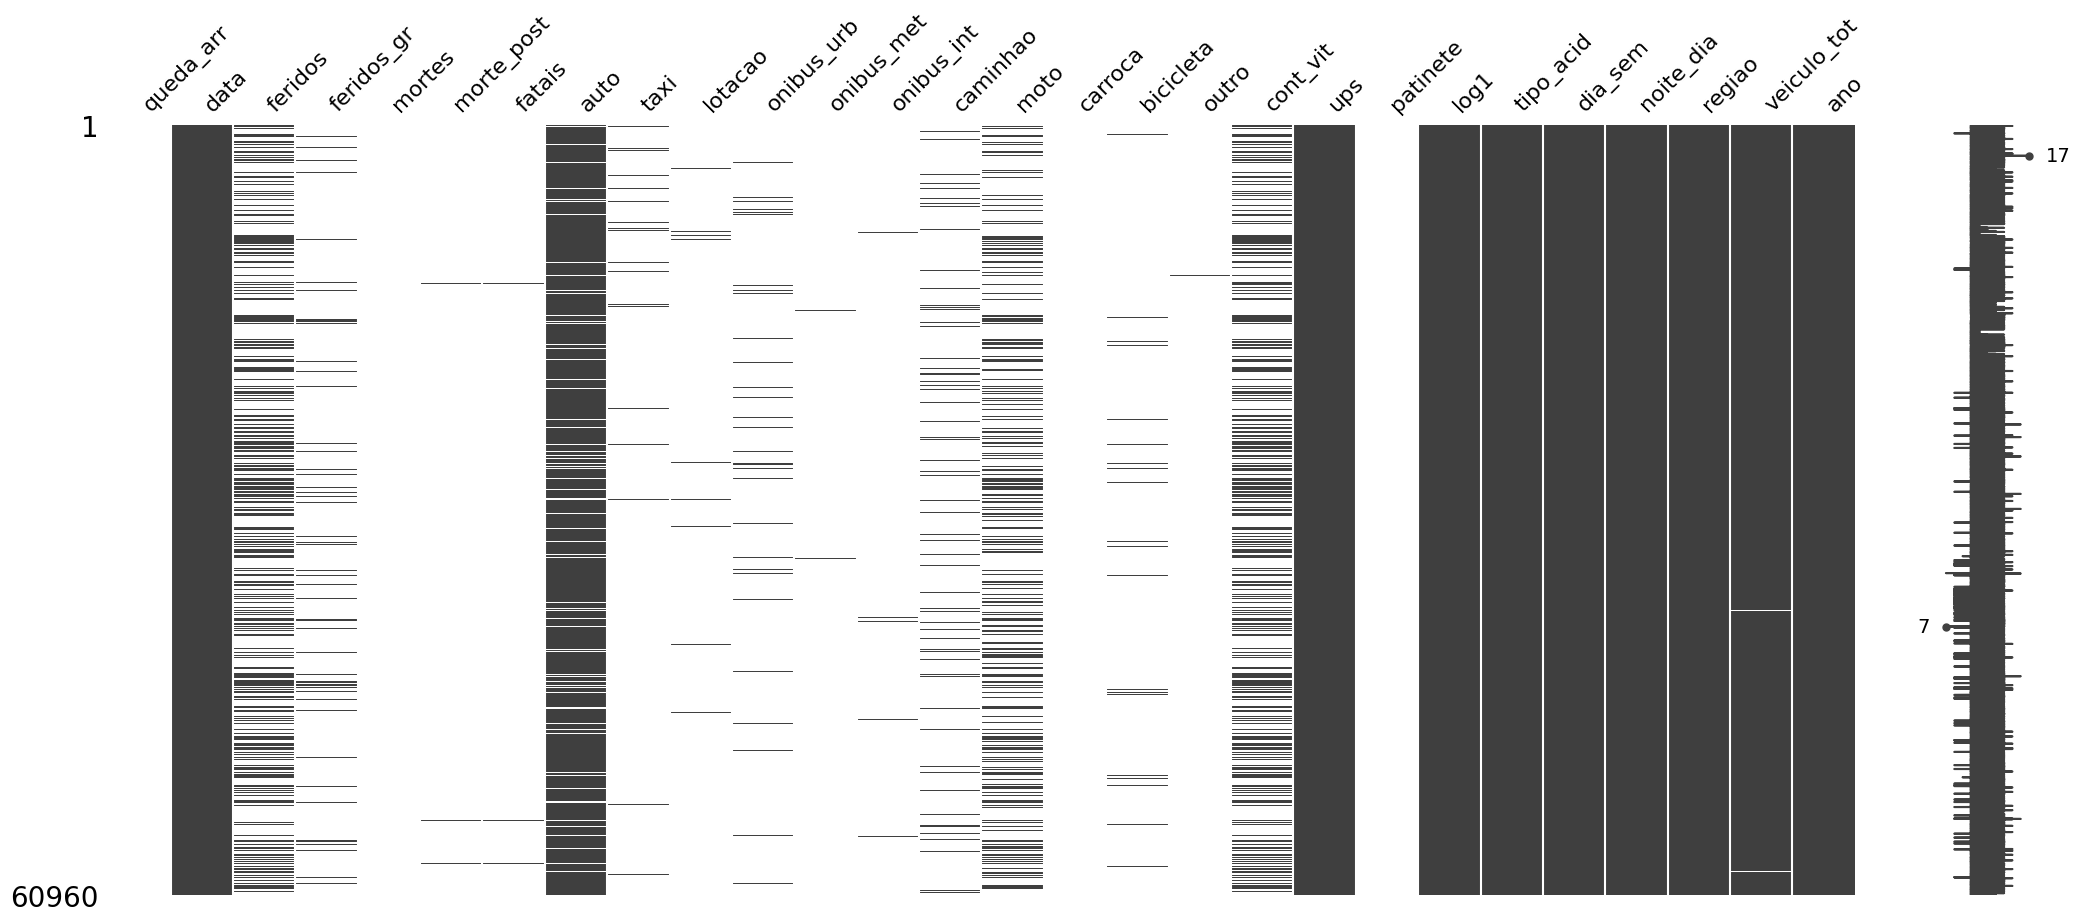

In [ ]:
# removendo as colunas sem relevância para o projeto
datasetSemMissings.drop(['data_extracao', 'predial1', 'idacidente', 'longitude', 'latitude', 'log2', 'hora', 'consorcio'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [ ]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

queda_arr      60911
data               0
feridos        38219
feridos_gr     56167
mortes         60778
morte_post     60784
fatais         60603
auto            6232
taxi           59411
lotacao        60317
onibus_urb     58596
onibus_met     60576
onibus_int     60408
caminhao       55695
moto           44051
carroca        60940
bicicleta      59731
outro          60850
cont_vit       37927
ups                0
patinete       60959
log1              22
tipo_acid          0
dia_sem            0
noite_dia          0
regiao             2
veiculo_tot      235
ano                0
dtype: int64

<Axes: >

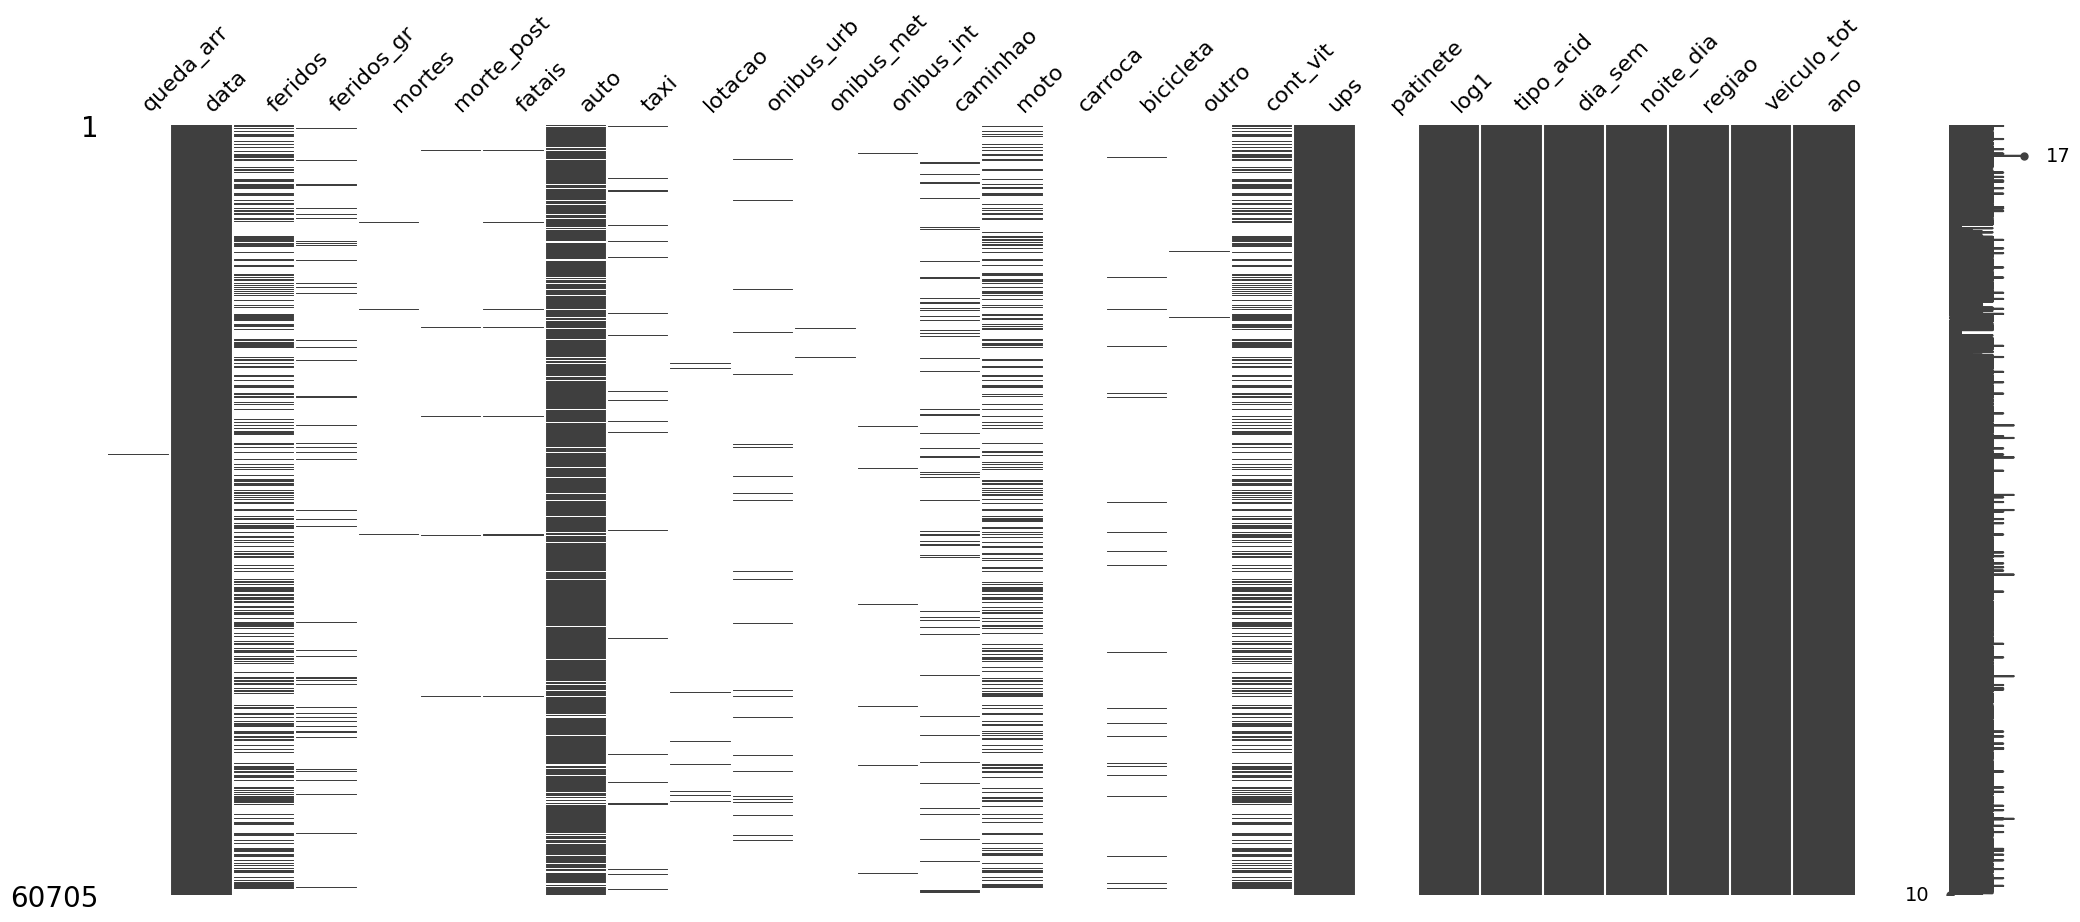

In [ ]:
# Retirar as linhas com valor "NaN" em todos os meios de transporte e regiao
datasetSemMissings = datasetSemMissings.dropna(subset=['veiculo_tot'])
datasetSemMissings = datasetSemMissings.dropna(subset=['regiao'])
datasetSemMissings = datasetSemMissings.dropna(subset=['log1'])
# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

As colunas que realmente são importantes estão alimentadas.

<Axes: >

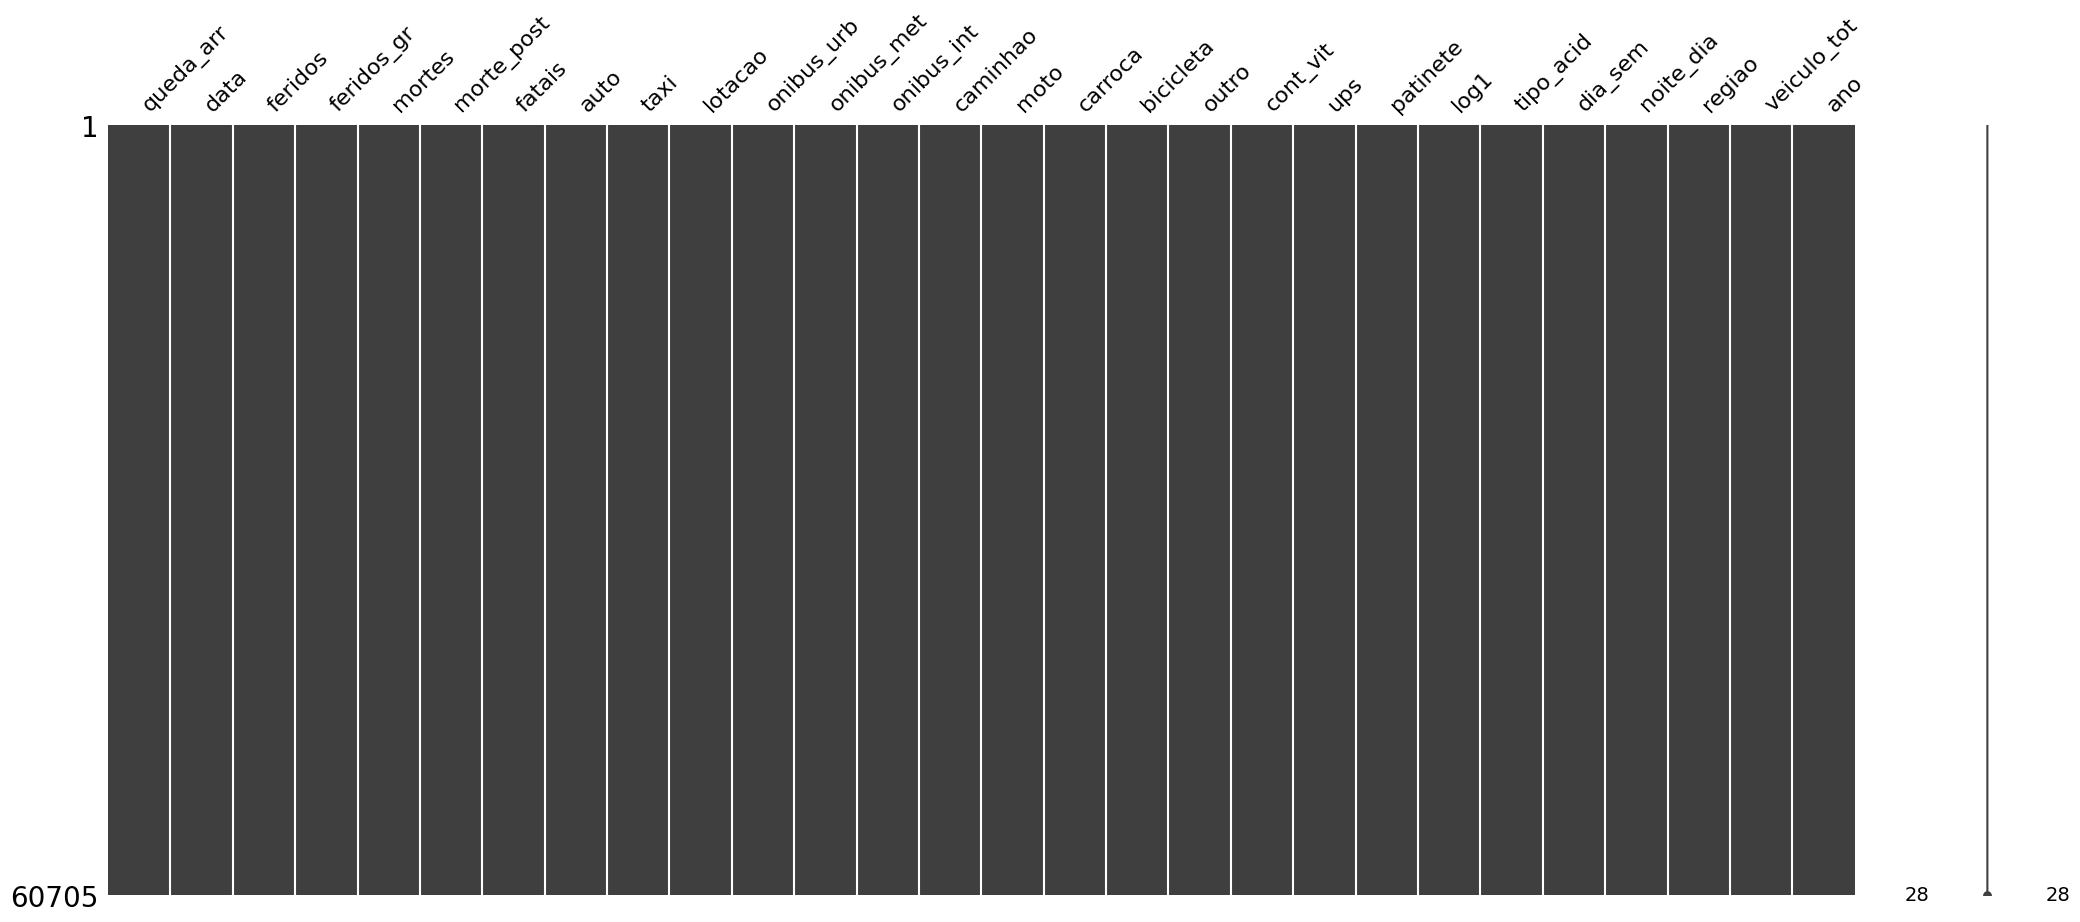

In [ ]:
# substituindo os NaN por 0 - voltando aos valores originais destas colunas
datasetSemMissings.fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [ ]:
# exibindo as primeiras linhas
datasetSemMissings.head()

,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,...,cont_vit,ups,patinete,log1,tipo_acid,dia_sem,noite_dia,regiao,veiculo_tot,ano
0,0.0,2020-10-17,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,1.0,5,0.0,R MARCOS MOREIRA,ABALROAMENTO,SÃBADO,NOITE,NORTE,4.0,2020
1,0.0,2018-01-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5,0.0,R CASEMIRO DE SOUZA,ATROPELAMENTO,SEGUNDA-FEIRA,NOITE,SUL,1.0,2018
2,0.0,2018-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,0.0,AV PROF OSCAR PEREIRA,COLISÃO,SEGUNDA-FEIRA,DIA,SUL,2.0,2018
3,0.0,2018-01-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5,0.0,AV BOA VISTA,CHOQUE,SEGUNDA-FEIRA,NOITE,SUL,1.0,2018
4,0.0,2018-01-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5,0.0,AV BOA VISTA,CHOQUE,SEGUNDA-FEIRA,DIA,SUL,1.0,2018


In [ ]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

queda_arr      0
data           0
feridos        0
feridos_gr     0
mortes         0
morte_post     0
fatais         0
auto           0
taxi           0
lotacao        0
onibus_urb     0
onibus_met     0
onibus_int     0
caminhao       0
moto           0
carroca        0
bicicleta      0
outro          0
cont_vit       0
ups            0
patinete       0
log1           0
tipo_acid      0
dia_sem        0
noite_dia      0
regiao         0
veiculo_tot    0
ano            0
dtype: int64

O dataset sem missings está completo, as linhas sem informação foram deletadas, o arquivo tem mais de 60 mil linhas, retirar 259 não fará uma diferença significativa.

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um tester para verificar o quão boa foi a construção do modelo, e para ter uma ideia de como o modelo irá performar nas estimativas em dados não vistos. será usado 80% do conjunto de dados para modelagem e 20% para teste. Será avaliado o total, o tipo de acidente, se foi a noite ou de dia, o dia da semana, o alvo é a data.

In [175]:
# Separando os componentes de input (X) e output (Y)
X = dataset.loc[:,['veiculo_tot','dia_sem','noite_dia','regiao','tipo_acid']]
Y = dataset.loc[:,['data']]
print('Informações X')
print(X)
print('Informações Y')
print(Y)


Informações X
       veiculo_tot        dia_sem noite_dia regiao      tipo_acid
0                4        SÃBADO     NOITE  NORTE   ABALROAMENTO
1                1  SEGUNDA-FEIRA     NOITE    SUL  ATROPELAMENTO
2                2  SEGUNDA-FEIRA       DIA    SUL       COLISÃO
3                1  SEGUNDA-FEIRA     NOITE    SUL         CHOQUE
4                1  SEGUNDA-FEIRA       DIA    SUL         CHOQUE
...            ...            ...       ...    ...            ...
60955            2   QUARTA-FEIRA       DIA  LESTE         CHOQUE
60956            2   QUARTA-FEIRA       DIA  LESTE   ABALROAMENTO
60957            2   QUARTA-FEIRA       DIA  LESTE       COLISÃO
60958            1   TERÃA-FEIRA       DIA  LESTE       COLISÃO
60959            2   TERÃA-FEIRA       DIA  LESTE       COLISÃO

[60960 rows x 5 columns]
Informações Y
            data
0     2020-10-17
1     2018-01-01
2     2018-01-01
3     2018-01-01
4     2018-01-01
...          ...
60955 2022-12-28
60956 2022-12-28
6

In [176]:
# Separação em conjuntos de treino e teste (dataset original)
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, shuffle=True, random_state=seed) 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=test_size, shuffle=True, random_state=seed, stratify=X['tipo_acid'])
print(X_train.groupby('tipo_acid').count())
print(X_test.groupby('tipo_acid').count())

                veiculo_tot  dia_sem  noite_dia  regiao
tipo_acid                                              
ABALROAMENTO          22942    22942      22942   22941
ATROPELAMENTO          2807     2807       2807    2806
CAPOTAGEM               247      247        247     247
CHOQUE                 4399     4399       4399    4399
COLISÃO              15021    15021      15021   15021
EVENTUAL                811      811        811     811
INCÃNDIO                20       20         20      20
NAO CADASTRADO          719      719        719     719
QUEDA                  1491     1491       1491    1491
TOMBAMENTO              311      311        311     311
                veiculo_tot  dia_sem  noite_dia  regiao
tipo_acid                                              
ABALROAMENTO           5736     5736       5736    5736
ATROPELAMENTO           702      702        702     702
CAPOTAGEM                62       62         62      62
CHOQUE                 1099     1099       1099 

In [177]:
# Separação em conjuntos de treino e teste (dataset sem missings)
X = datasetSemMissings.loc[:,['veiculo_tot','dia_sem','noite_dia','regiao','tipo_acid']]
Y = datasetSemMissings.loc[:,['data']]
print('Informações X')
print(X)
print('Informações Y')
print(Y)


Informações X
       veiculo_tot        dia_sem noite_dia regiao      tipo_acid
0              4.0        SÃBADO     NOITE  NORTE   ABALROAMENTO
1              1.0  SEGUNDA-FEIRA     NOITE    SUL  ATROPELAMENTO
2              2.0  SEGUNDA-FEIRA       DIA    SUL       COLISÃO
3              1.0  SEGUNDA-FEIRA     NOITE    SUL         CHOQUE
4              1.0  SEGUNDA-FEIRA       DIA    SUL         CHOQUE
...            ...            ...       ...    ...            ...
60955          2.0   QUARTA-FEIRA       DIA  LESTE         CHOQUE
60956          2.0   QUARTA-FEIRA       DIA  LESTE   ABALROAMENTO
60957          2.0   QUARTA-FEIRA       DIA  LESTE       COLISÃO
60958          1.0   TERÃA-FEIRA       DIA  LESTE       COLISÃO
60959          2.0   TERÃA-FEIRA       DIA  LESTE       COLISÃO

[60705 rows x 5 columns]
Informações Y
            data
0     2020-10-17
1     2018-01-01
2     2018-01-01
3     2018-01-01
4     2018-01-01
...          ...
60955 2022-12-28
60956 2022-12-28
6

Os dados Sem Missings aparentemente parecem ser muito próximos do arquivo original, como previsto a limpeza não afetou os dados como um todo.

### 4.3 One  Hot Encoding

In [ ]:
# definindo o transformador como one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# transformando os dados
onehot = encoder.fit_transform(dataset[['tipo_acid', 'dia_sem', 'noite_dia', 'regiao']])
print(onehot)


[[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 4.4 Normalização

Como esse dataset tem informações muito distribuidas, será realizada a normalização.

In [ ]:
# Normalização

# definindo o transformador como min max scaler
scaler = MinMaxScaler()
# transformando os dados de treino
scaled_y_train = scaler.fit_transform(y_train)
print(scaled_y_train)

[[0.3]
 [0.2]
 [0.2]
 ...
 [0.1]
 [0.2]
 [0.2]]


In [ ]:
# transformando os dados de teste
scaled_y_test = scaler.fit_transform(y_test)
print(scaled_y_test)

[[0.16666667]
 [0.16666667]
 [0.16666667]
 ...
 [0.16666667]
 [0.16666667]
 [0.08333333]]


Pré-processamento realizado, percebe-se que em Porto Alegre a pandemia foi u período atípico para diversas áreas, inclusive para os acidentes de trânsito, diminuindo (positivamente) a quantidade de acidentes, a cidade apresenta mais acidente entre carros, mas ousa-se dizer que dirigem com uma certa segurança, já que são poucos óbitos ou feridos e os acidentes são durante o dia, já que geralmete as pessoas a noite se preocupam com o lazer, mas com segurança. 
Para fechar o trabalho, falta avaliar a acurácia das informações, mas acredito que deve ser ensinado no próximo módulo.